# Wheat and Chessboard Problem

## 1. Goal
This assignment requires learners to:
- Practice basic array operations with Python lists and NumPy ndarrays
- Get comfortable modeling exponential growth on grids
- Visualize results with simple Matplotlib charts

## 2. Wheat and Chessboard Problem
If a chessboard receives grains of wheat such that the first square has 1 grain, the second has 2, the third has 4, and so on, what is the final number of grains on an 8×8 board?

This assignment requires building up from a tiny example to the full 8×8 board and then generalizing to an n×m grid using NumPy.


## 3. Think in Small Blocks
This assignment starts with a small 1×4 board using a Python list and a `for` loop, then converts to a NumPy array.


In [ ]:
# 1×4 board using a Python list
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2 * small_board_list[-1])
print("1×4 board (list):", small_board_list)

# Convert to ndarray
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("1×4 board (ndarray):", small_board_ndarray)

1×4 board (list): [1, 2, 4, 8]
1×4 board (ndarray): [1 2 4 8]


## 4. 2×2 Chessboard-ndarray shaping
This assignment requires representing a 2×2 chessboard as an ndarray and placing grains in doubling order:

- Top-left: 1
- Top-right: 2
- Bottom-left: 4
- Bottom-right: 8

The shape should be (2, 2)

In [ ]:
# Build values [1, 2, 4, 8] and reshape to 2×2
vals_2x2 = np.array([1, 2, 4, 8])
board_2x2 = vals_2x2.reshape(2, 2)
print(board_2x2)

[[1 2]
 [4 8]]



## 5. 8×8 Chessboard and Generalization to n×m
This assignment requires creating a function that returns an ndarray containing grains for an n×m board (doubling left-to-right, top-to-bottom).


In [ ]:
def chessboard_grains_nm(n_rows=8, n_cols=8, dtype=np.uint64):
    """Return an ndarray of shape (n_rows, n_cols) where cell (0,0)=1 and
    each subsequent cell doubles the previous, filled row-wise.
    dtype controls storage; use np.uint64 to avoid negative overflow in signed int64.
    """
    n_cells = n_rows * n_cols

    indices = np.arange(n_cells, dtype=np.uint64)
    flat = (2 ** indices).astype(dtype, copy=False)
    return flat.reshape(n_rows, n_cols)

board_8x8 = chessboard_grains_nm(8, 8, dtype=np.uint64)
print("8×8 board created with dtype=uint64. Shape:", board_8x8.shape)
print("Top-left:", board_8x8[0,0], "| Bottom-right:", board_8x8[-1,-1])  # No of grains on first and last cell

8×8 board created with dtype=uint64. Shape: (8, 8)
Top-left: 1 | Bottom-right: 9223372036854775808


## 6. Total Number of Grains and Column Averages
We then compute the following:
- The **total number of grains** on the 8×8 board
- The **average grains per column** (8 values), then visualizing with a bar chart

In [ ]:
# Total grains use Python int
total_grains = int(board_8x8.astype(object).sum())
col_means = board_8x8.astype(object).mean(axis=0)  # object ensures Python int math

print("Total grains on 8×8:", total_grains)
print("Column means (first 3 shown):", col_means[:3], "...") # and so on and so forth

Total grains on 8×8: 18446744073709551615
Column means (first 3 shown): [9042521604759584.0 1.808504320951917e+16 3.617008641903834e+16] ...


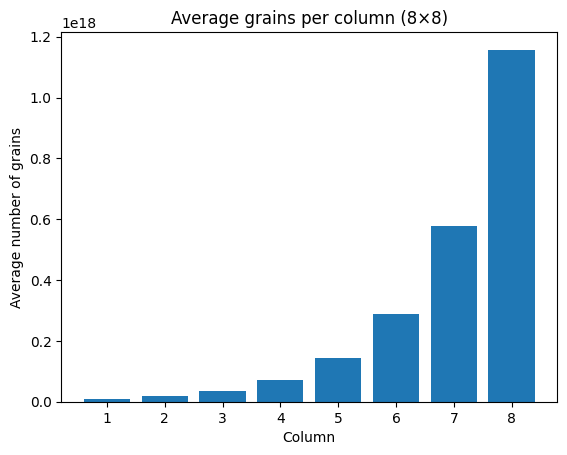

In [ ]:
# Bar chart of column means
import matplotlib.pyplot as plt
import numpy as np

plt.title("Average grains per column (8×8)")
plt.xlabel("Column")
plt.ylabel("Average number of grains")
plt.bar(np.arange(1, 8+1), [int(x) for x in col_means])  # cast to int
plt.show()

## 7. Heatmap of the 8×8 Board
This assignment requires visualizing the 8×8 board as a heatmap (larger value = brighter).

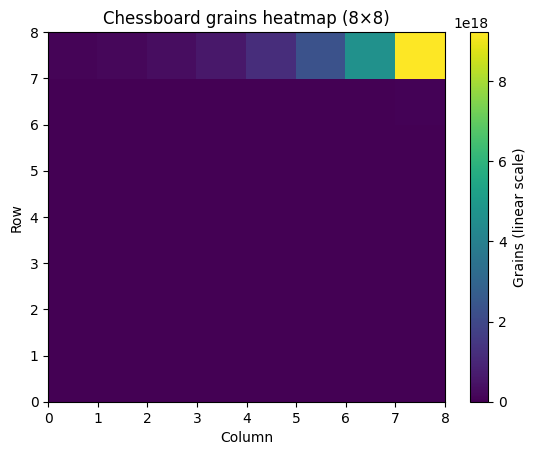

In [ ]:
plt.title("Chessboard grains heatmap (8×8)")
plt.xlabel("Column")
plt.ylabel("Row")
plt.pcolor(board_8x8.astype(float))  # float helps pcolor
plt.colorbar(label="Grains (linear scale)")
plt.show()

Due to the sudden cumulative effect in the second half, from the heatmap we can visualize or clearly see how big the wheat had multiplied, especially in the last row.

## 8. The Second Half of the Chessboard
This assignment refers to the idea that the second half dominates the total. (This is definitely true)
So we compute the ratio between the sum of the second half and the first half.

In [ ]:
# First half: rows 0..3; second half: rows 4..7 - by index
first_half_sum = int(board_8x8[:4, :].astype(object).sum())
second_half_sum = int(board_8x8[4:, :].astype(object).sum())

ratio = second_half_sum / first_half_sum if first_half_sum != 0 else float("inf")
print("First-half sum:", first_half_sum)
print("Second-half sum:", second_half_sum)
print("Second-half / First-half ratio:", ratio)

First-half sum: 4294967295
Second-half sum: 18446744069414584320
Second-half / First-half ratio: 4294967296.0



## 9. Other Calculation Methods
This assignment requires demonstrating alternative ways to populate the board.
Two examples are shown: iterative `np.append` and vectorized broadcasting.


In [ ]:
# Method A: iterative np.append (less efficient)
n_squares = 64
arr = np.array([1], dtype=np.uint64)
for _ in range(n_squares - 1):
    arr = np.append(arr, 2 * arr[-1])
board_append = arr.reshape(8, 8)
print("Append method: bottom-right =", board_append[-1, -1])

Append method: bottom-right = 9223372036854775808


In [ ]:
# Method B: broadcasting (efficient)
indices = np.arange(64, dtype=np.uint64)
board_broadcast = (2 ** indices).reshape(8, 8)
print("Broadcast method: bottom-right =", board_broadcast[-1, -1])

Broadcast method: bottom-right = 9223372036854775808


## 10. Data Types and Overflow
This assignment highlights that signed 64-bit integers (`int64`) overflow for the last square (2⁶³), producing a negative number.
Using `uint64` avoids negativity for per-cell values up to 2⁶³, but the **total sum** will still overflow if kept in `uint64`.
Promoting to Python `int` via `astype(object)` when summing prevents overflow.

In [ ]:
# Demonstrate signed overflow if forced to int64 at the last square
indices_i64 = np.arange(64, dtype=np.int64)
board_i64 = (2 ** indices_i64).reshape(8, 8)  # overflow occurs for 2**63
print("Signed int64 last cell (shows overflow):", board_i64[-1, -1])
print("Correct value with uint64:", board_8x8[-1, -1])

Signed int64 last cell (shows overflow): -9223372036854775808
Correct value with uint64: 9223372036854775808
